In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from itertools import groupby

In [2]:
prod_df = pd.read_csv('Production_Data_3-19-2020',delimiter='\t',header=1,thousands=',')
keys = prod_df.keys()
year = keys[0]
pennies = keys[1]
nickles = keys[2]
dimes = keys[3]
quarters = keys[4]

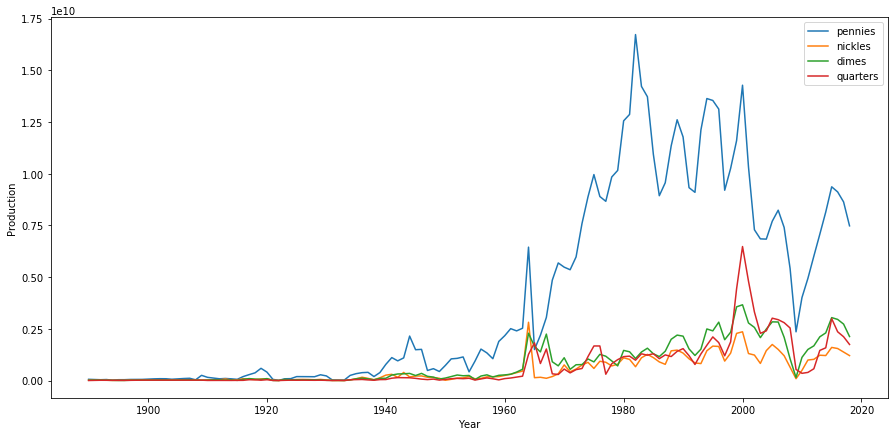

In [4]:
fig,ax = plt.subplots(figsize=(15,7))
plt.plot(prod_df[year],prod_df[pennies],label='pennies')
plt.plot(prod_df[year],prod_df[nickles],label='nickles')
plt.plot(prod_df[year],prod_df[dimes],label='dimes')
plt.plot(prod_df[year],prod_df[quarters],label='quarters')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Production")
plt.savefig('./imgs/production_years.png',dpi=300)

In [6]:
#split into decades https://stackoverflow.com/questions/31481589/separating-list-of-years-into-decades?noredirect=1&lq=1
groups = [list(g) for k,g in groupby(prod_df[year].values, lambda i: i // 10)]

[[1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899],
 [1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909],
 [1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919],
 [1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929],
 [1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939],
 [1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949],
 [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959],
 [1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969],
 [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979],
 [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989],
 [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999],
 [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009],
 [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]]

In [7]:
#get indicies for each decade
inds = [np.flatnonzero(np.isin(prod_df[year].values,group)) for group in groups]

In [8]:
decade=[]
penny=[]
nickle=[]
dime=[]
quarter=[]
for i in range(len(groups)):
    decade.append(groups[i][0])
    penny.append(np.sum(prod_df[pennies].values[inds[i]]))
    nickle.append(np.sum(prod_df[nickles].values[inds[i]]))
    dime.append(np.sum(prod_df[dimes].values[inds[i]]))
    quarter.append(np.sum(prod_df[quarters].values[inds[i]]))
    
    
decade=np.asarray(decade)
penny=np.asarray(penny)
nickle=np.asarray(nickle)
dime=np.asarray(dime)
quarter=np.asarray(quarter)

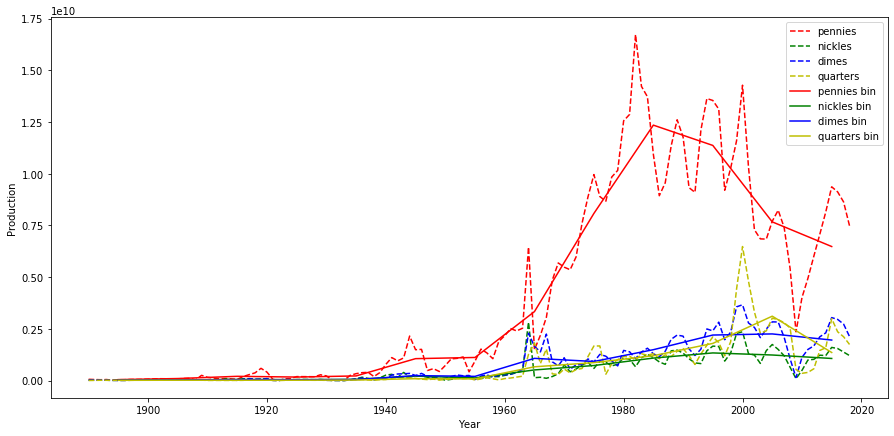

In [9]:
fig,ax = plt.subplots(figsize=(15,7))
plt.plot(prod_df[year],prod_df[pennies],label='pennies',c='r',ls='--')
plt.plot(prod_df[year],prod_df[nickles],label='nickles',c='g',ls='--')
plt.plot(prod_df[year],prod_df[dimes],label='dimes',c='b',ls='--')
plt.plot(prod_df[year],prod_df[quarters],label='quarters',c='y',ls='--')
plt.plot(decade+5,penny/10,label='pennies bin',c='r')
plt.plot(decade+5,nickle/10,label='nickles bin',c='g')
plt.plot(decade+5,dime/10,label='dimes bin',c='b')
plt.plot(decade+5,quarter/10,label='quarters bin',c='y')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Production")
plt.savefig('./imgs/production_decades.png',dpi=300)

## Now lets load in the coins data

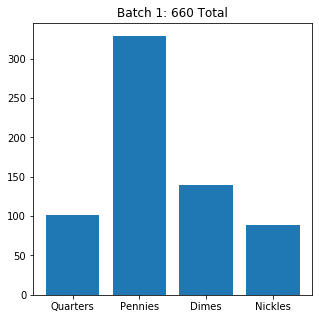

In [10]:
coins1 = pd.read_csv('coins1.tsv',delimiter='\t',thousands=',')

fig, ax = plt.subplots(figsize=(5,5))
x = np.arange(4)
yvals =  np.sum(coins1['Quarters']),np.sum(coins1['Pennies']),np.sum(coins1['Dimes']),np.sum(coins1['Nickles'])
plt.bar(x,yvals)
plt.xticks(x, ('Quarters', 'Pennies', 'Dimes', 'Nickles'))
totals =  np.sum(coins1.iloc[:,1:].values)
plt.title("Batch 1: "+str(totals)+' Total')
plt.savefig('./imgs/count1.png',dpi=300)
plt.show()

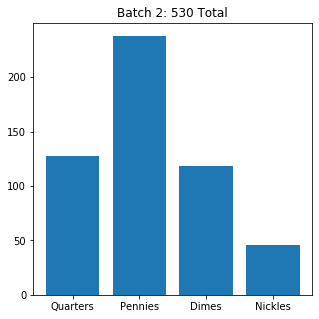

In [11]:
coins2 = pd.read_csv('coins2.tsv',delimiter='\t',thousands=',')

fig, ax = plt.subplots(figsize=(5,5))
x = np.arange(4)
yvals =  np.sum(coins2['Quarters']),np.sum(coins2['Pennies']),np.sum(coins2['Dimes']),np.sum(coins2['Nickles'])
plt.bar(x,yvals)
plt.xticks(x, ('Quarters', 'Pennies', 'Dimes', 'Nickles'))
totals =  np.sum(coins2.iloc[:,1:].values)
plt.title("Batch 2: "+str(totals)+' Total')
plt.savefig('./imgs/count2.png',dpi=300)
plt.show()

## Lets look at normalized distributions:

In [12]:
n_penny=penny/np.max(penny)
n_nickle=nickle/np.max(nickle)
n_dime=dime/np.max(dime)
n_quarter=quarter/np.max(quarter)

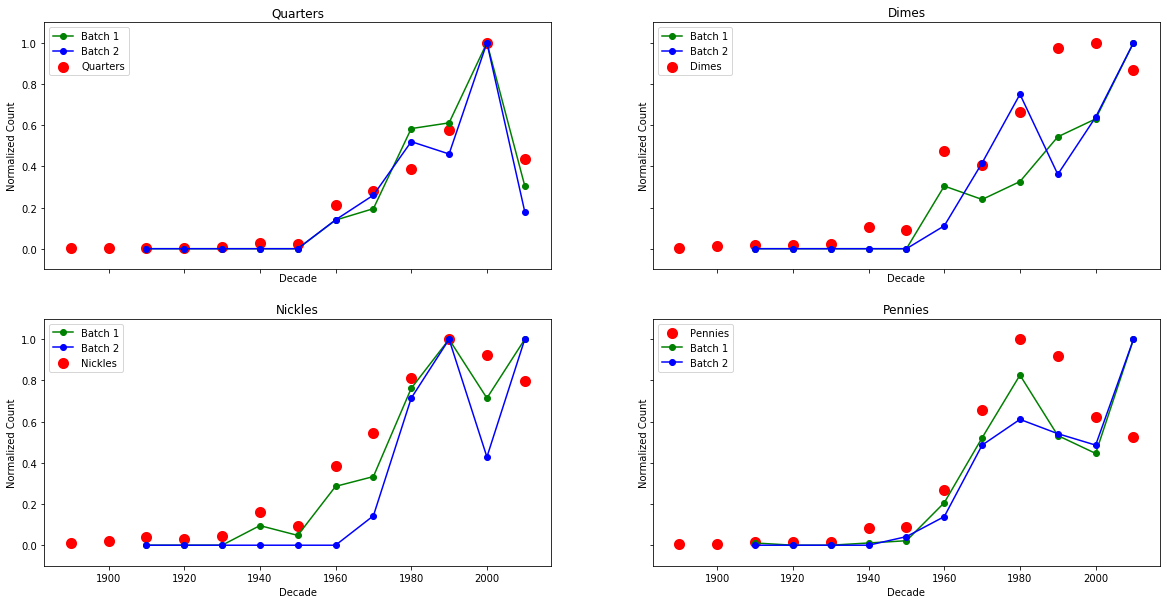

In [13]:
xs1 = coins1['Decade']
xs2 = coins2['Decade']

fig,ax = plt.subplots(ncols=2,nrows=2,figsize=(20,10),sharex=True,sharey=True)

strng='Quarters'
ax[0,0].plot(xs1,coins1[strng]/np.max(coins1[strng]),marker='o',c='g',label='Batch 1')
ax[0,0].plot(xs2,coins2[strng]/np.max(coins2[strng]),marker='o',c='b',label='Batch 2')
ax[0,0].scatter(decade,n_quarter,label=strng,c='r',lw=4,zorder=0,s=50)
ax[0,0].set_title(strng)
ax[0,0].set_xlabel('Decade')
ax[0,0].set_ylabel('Normalized Count')
ax[0,0].legend(loc='upper left')

strng='Dimes'
ax[0,1].plot(xs1,coins1[strng]/np.max(coins1[strng]),marker='o',c='g',label='Batch 1')
ax[0,1].plot(xs2,coins2[strng]/np.max(coins2[strng]),marker='o',c='b',label='Batch 2')
ax[0,1].scatter(decade,n_dime,label=strng,c='r',lw=4,zorder=0,s=50)
ax[0,1].set_title(strng)
ax[0,1].set_xlabel('Decade')
ax[0,1].set_ylabel('Normalized Count')
ax[0,1].legend(loc='upper left')

strng='Nickles'
ax[1,0].plot(xs1,coins1[strng]/np.max(coins1[strng]),marker='o',c='g',label='Batch 1')
ax[1,0].plot(xs2,coins2[strng]/np.max(coins2[strng]),marker='o',c='b',label='Batch 2')
ax[1,0].scatter(decade,n_nickle,label=strng,c='r',lw=4,zorder=0,s=50)
ax[1,0].set_title(strng)
ax[1,0].set_xlabel('Decade')
ax[1,0].set_ylabel('Normalized Count')
ax[1,0].legend(loc='upper left')

strng='Pennies'
ax[1,1].errorbar(xs1,coins1[strng]/np.max(coins1[strng]),marker='o',c='g',label='Batch 1')
ax[1,1].errorbar(xs2,coins2[strng]/np.max(coins2[strng]),marker='o',c='b',label='Batch 2')
ax[1,1].scatter(decade,n_penny,label=strng,c='r',lw=4,zorder=0,s=50)
ax[1,1].set_title(strng)
ax[1,1].set_xlabel('Decade')
ax[1,1].set_ylabel('Normalized Count')
ax[1,1].legend(loc='upper left')

plt.ylim(-0.1,1.1)

plt.savefig('./imgs/comparison1.png',dpi=300)


### Lets do a simulation to check our errors

In [14]:
def getratio(N,decade,probs):
    res = np.random.choice(decade, size=N, p=probs)

    count = []
    for dec in decade:
        count.append(np.count_nonzero(res==dec))
    ncount = np.asarray(count)/float(np.max(count))

    return ncount 

def getconfidence(draws,N,decade,probs):
    ratios = []
    for i in range(draws): #do this 100 times
        ratio = getratio(N,decade,probs)
        ratios.append(ratio)
    ratios = np.asarray(ratios)
    
    upper_95 = np.percentile(ratios,97.5,axis=0)
    lower_95 = np.percentile(ratios,2.5,axis=0)
    return upper_95, lower_95

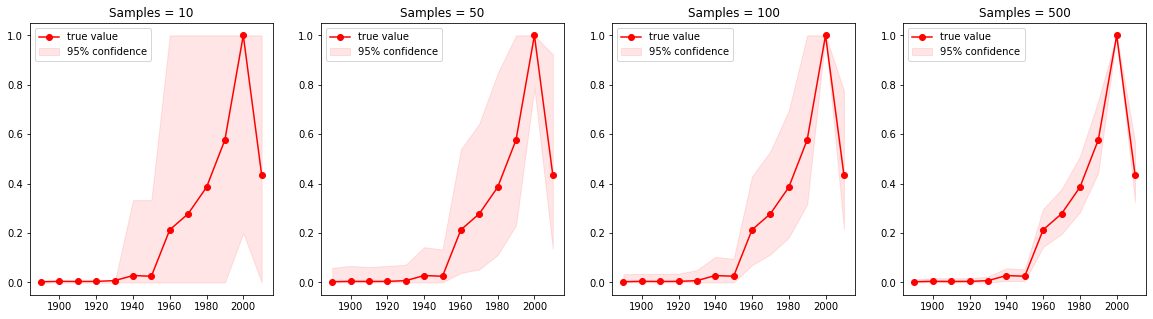

In [15]:
fig,ax = plt.subplots(ncols=4,figsize=(20,5))

samples = [10,50,100,500]
for i in range(4):
    Q_upper95, Q_lower95 = getconfidence(10000,samples[i],decade,n_quarter/np.sum(n_quarter))
    ax[i].plot(decade,n_quarter,marker='o',c='r',label='true value')
    ax[i].fill_between(decade, Q_upper95, Q_lower95,color='r',alpha=0.1,label='95% confidence')
    ax[i].set_title("Samples = "+str(samples[i]))
    ax[i].legend(loc='upper left')
    
plt.savefig('./imgs/error_simulation.png',dpi=300)


## Lets make a new dataframe which is all coins together

In [16]:
coins3 = coins1.drop('Decade',1)+coins2.drop('Decade',1)
coins3['Decade'] = coins1['Decade']

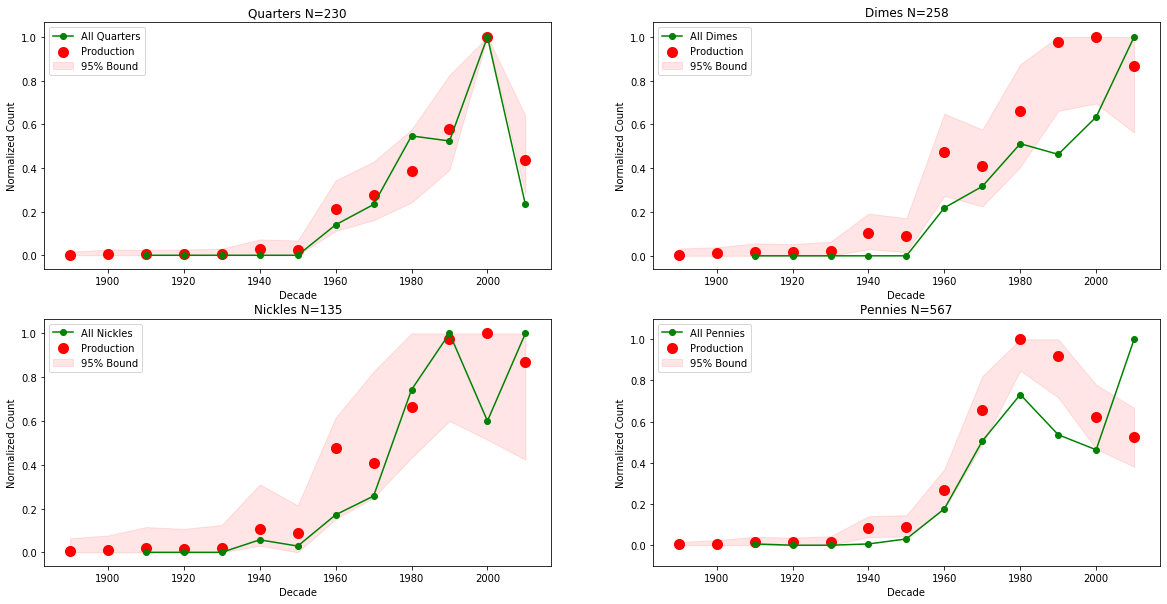

In [17]:
xs3 = coins3['Decade']

fig,ax = plt.subplots(ncols=2,nrows=2,figsize=(20,10))

strng='Quarters'
ys = coins3[strng]/np.max(coins3[strng])
upper95, lower95 = getconfidence(10000,np.sum(coins3[strng].values),decade,n_quarter/np.sum(n_quarter))
ax[0,0].plot(xs3,ys,marker='o',c='g',label='All '+strng)
ax[0,0].scatter(decade,n_quarter,label='Production',c='r',lw=4,zorder=0,s=50)
ax[0,0].fill_between(decade, upper95, lower95,color='r',alpha=0.1,label='95% Bound')
ax[0,0].set_title(strng+' N='+str(np.sum(coins3[strng].values)))
ax[0,0].set_xlabel('Decade')
ax[0,0].set_ylabel('Normalized Count')
ax[0,0].legend(loc='upper left')


strng='Dimes'
ys = coins3[strng]/np.max(coins3[strng])
upper95, lower95 = getconfidence(10000,np.sum(coins3[strng].values),decade,n_dime/np.sum(n_dime))
ax[0,1].plot(xs3,ys,marker='o',c='g',label='All '+strng)
ax[0,1].scatter(decade,n_dime,label='Production',c='r',lw=4,zorder=0,s=50)
ax[0,1].fill_between(decade, upper95, lower95,color='r',alpha=0.1,label='95% Bound')
ax[0,1].set_title(strng+' N='+str(np.sum(coins3[strng].values)))
ax[0,1].set_xlabel('Decade')
ax[0,1].set_ylabel('Normalized Count')
ax[0,1].legend(loc='upper left')

strng='Nickles'
ys = coins3[strng]/np.max(coins3[strng])
upper95, lower95 = getconfidence(10000,np.sum(coins3[strng].values),decade,n_nickle/np.sum(n_nickle))
ax[1,0].plot(xs3,ys,marker='o',c='g',label='All '+strng)
ax[1,0].scatter(decade,n_dime,label='Production',c='r',lw=4,zorder=0,s=50)
ax[1,0].fill_between(decade, upper95, lower95,color='r',alpha=0.1,label='95% Bound')
ax[1,0].set_title(strng+' N='+str(np.sum(coins3[strng].values)))
ax[1,0].set_xlabel('Decade')
ax[1,0].set_ylabel('Normalized Count')
ax[1,0].legend(loc='upper left')

strng='Pennies'
ys = coins3[strng]/np.max(coins3[strng])
upper95, lower95 = getconfidence(10000,np.sum(coins3[strng].values),decade,n_penny/np.sum(n_penny))
ax[1,1].plot(xs3,ys,marker='o',c='g',label='All '+strng)
ax[1,1].scatter(decade,n_penny,label='Production',c='r',lw=4,zorder=0,s=50)
ax[1,1].fill_between(decade, upper95, lower95,color='r',alpha=0.1,label='95% Bound')
ax[1,1].set_title(strng+' N='+str(np.sum(coins3[strng].values)))
ax[1,1].set_xlabel('Decade')
ax[1,1].set_ylabel('Normalized Count')
ax[1,1].legend(loc='upper left')


plt.ylim(-0.1,1.1)

plt.savefig('./imgs/comparison2.png',dpi=300)